In [2]:
from timeit import Timer
import matplotlib.pyplot as plt
import numpy as np

#If you're using pybhjet in another directory from where you built it: 
# import sys
# sys.path.append("/path/to/pybhjet")

# import sys
# sys.path.append("/Users/ruby/Models/PyBHJet")

import build.pybhjet as pybhjet 
import math
from bhjet_plotting import *
bhjet = pybhjet.PyBHJet()

erg2eV = 6.242e+11 #1erg in eV
Hz2eV = 4.13566553853599e-15 # 1Hz in eV
mjy_conv = 1e26 

In [16]:
bhjet.load_params("../ip.dat") 

#command for setting parameters: 
# bhjet.set_parameter("r_0", 10)

#command for listing parameters: 
bhjet.print_parameters()

BHJet Parameters:
-----------------
Mbh      : 6.6e+08     M_sun
theta    : 66          degrees
dist     : 9080        kpc
redsh    : 0.003633    
jetrat   : 0.00064     Eddington ratio
r_0      : 7.72058     Jet base radius, R_g
z_diss   : 24.971      nT particle injection region, R_g
z_acc    : 24.971      Jet acceleration region, R_g
z_max    : 100000      Maximum Jet Distance, R_g
t_e      : 655.986     Temperature of rel. electrons in nozzle, keV
f_nth    : 0.1         Percentage of particles acc. into nT tail 
f_pl     : 4.67634     Dissipation Parameter
pspec    : 1.5         Slope of nT lepton distribution
f_heat   : 16.247      Shock Heating
f_beta   : 0.1         Adiabatic Cooling Timescale
f_sc     : 7.98968e-09  < 0.1, Max. E of nT particles
p_beta   : 0.02        Plasma Beta [Regulates Pair Content in BHJet for velsw > 1] 
sig_acc  : 0.01        Magnetization at acceleration region
l_disk   : 2.3e-06     Disk Luminosity, L_edd
r_in     : 20          Inner Disk Radius, R_g


In [17]:
#running bhjet with set parameters: 
bhjet.run()
output = bhjet.get_output()

#for accessing the output/ making plots of the output: 
components = preprocess_component_output(output)

In [18]:
#example of how the data can be directly accesible: 

print(components["presyn"]["energy"], components["presyn"]["flux"])
#the data out of bhjet comes as frequency(hz) and flux (mJy)

[2.71941092e+07 3.41961588e+07 4.30011245e+07 5.40732284e+07
 6.79962227e+07 8.55041660e+07 1.07520125e+08 1.35204844e+08
 1.70017935e+08 2.13794843e+08 2.68843607e+08 3.38066549e+08
 4.25113296e+08 5.34573192e+08 6.72217266e+08 8.45302495e+08
 1.06295441e+09 1.33664822e+09 1.68081383e+09 2.11359660e+09
 2.65781402e+09 3.34215876e+09 4.20271136e+09 5.28484253e+09
 6.64560522e+09 8.35674262e+09 1.05084706e+10 1.32142343e+10
 1.66166889e+10 2.08952214e+10 2.62754077e+10 3.30409063e+10
 4.15484129e+10 5.22464669e+10 6.56990991e+10 8.26155697e+10
 1.03887762e+11 1.30637204e+11 1.64274201e+11 2.06572189e+11
 2.59761235e+11 3.26645611e+11 4.10751648e+11 5.16513649e+11
 6.49507679e+11 8.16745551e+11 1.02704451e+12 1.29149210e+12
 1.62403072e+12 2.04219274e+12 2.56802481e+12 3.22925026e+12
 4.06073071e+12 5.10630413e+12 6.42109604e+12 8.07442590e+12
 1.01534618e+13 1.27678164e+13 1.60553255e+13 2.01893159e+13
 2.53877429e+13 3.19246819e+13 4.01447785e+13 5.04814189e+13
 6.34795795e+13 7.982455

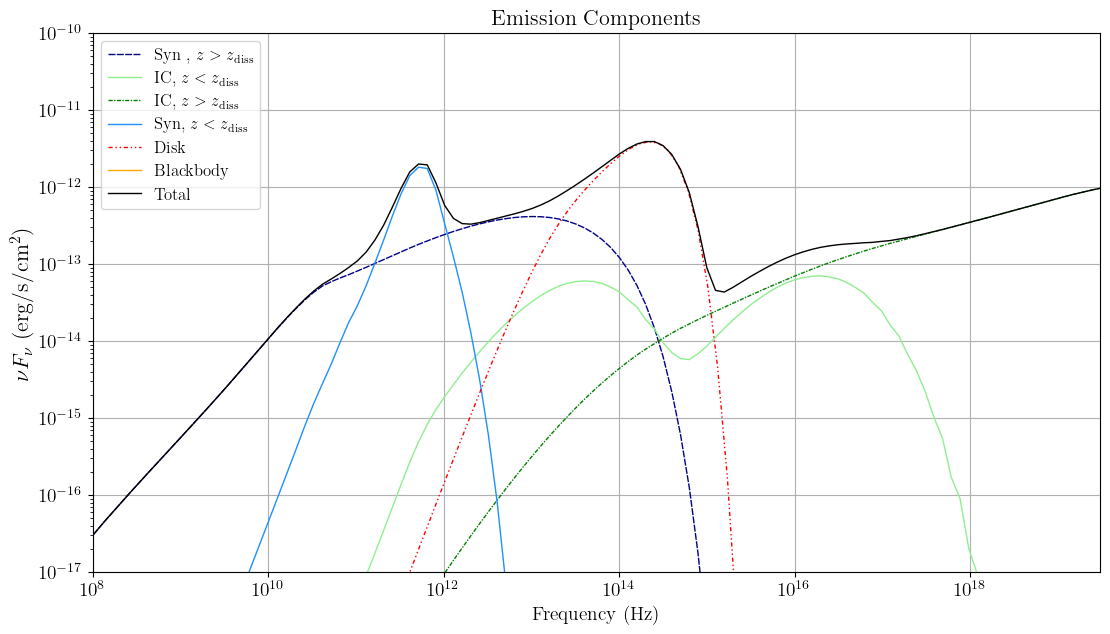

In [21]:
# plot_nufnu_ergshz(/name/of/df/from/preprocessing/fcn)
plot_nufnu_ergshz(components)

plt.xlim(1e8, 3e19)
plt.ylim(1e-17, 1e-10)

plt.show()